## Decision Tree

Import statements

In [449]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
import warnings
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

#not using atm
# from sklearn.tree import DecisionTreeRegressor, export_graphviz

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

Reading in our feature set

In [450]:
feature_set = pd.read_pickle("feature_set.pkl")
feature_set.head(3)

,max_temp,precip,amount,day_of_week,hour_of_the_day,month
hour_from_zero,,,,,,
1,15.6,0,19,1,1,1
2,15.0,0,8,1,2,1
3,15.0,0,16,1,3,1


Try different depths in order to get the best fit using r^2

In [451]:
depths = [None, 2,3,4,5,6,7,8,9,10,15,20,25, 50, 100]
scores_mean = []

In [452]:
for depth_ in depths:
    regressor = DecisionTreeRegressor(max_depth = depth_)
# regressor.fit(weather_demand_final[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
#               weather_demand_final['amount'])


    regressor.fit(feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                  feature_set['amount'])
    
    scores = cross_val_score(regressor, feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                          feature_set['amount'], scoring='r2', cv=10)
    scores_mean.append((depth_, scores.mean()))
    #print(depth_, scores.mean())


In [453]:
scores_mean

[(None, 0.5060412148230451),
 (2, 0.502408513181395),
 (3, 0.5749308842211861),
 (4, 0.6240770021668569),
 (5, 0.6585073867583464),
 (6, 0.6715852300496341),
 (7, 0.674163888735127),
 (8, 0.6750496925374642),
 (9, 0.661699865570951),
 (10, 0.6245959887025826),
 (15, 0.5327021230162161),
 (20, 0.5163585275369398),
 (25, 0.5217575058876276),
 (50, 0.5286934432258941),
 (100, 0.5243622017930922)]

Plot the r^2 values for different depths

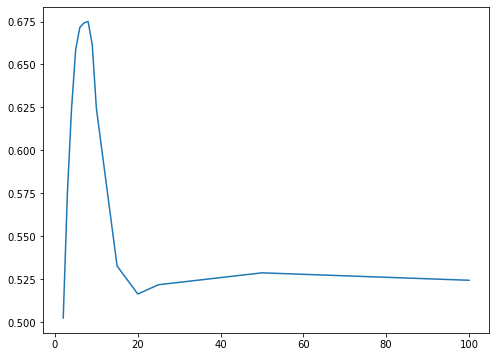

In [454]:
plt.figure(figsize = (8,6))
x,y = zip(*scores_mean)
plt.plot(x,y)

Search for best depth

In [455]:
max(scores_mean ,key=lambda item:item[1])

(8, 0.6750496925374642)

Using depth = 8, trying different number of splits

In [456]:
regressor = DecisionTreeRegressor(max_depth=8)
regressor

DecisionTreeRegressor(max_depth=8)

In [457]:
number_of_splits = []
for i in range (2,15):
    number_of_splits.append(i)

In [458]:
scores_mean = []
for num in number_of_splits:
    scores = cross_val_score(regressor, feature_set[['max_temp', 'precip', 'day_of_week', 
                                                                'hour_of_the_day', 'month']], 
                              feature_set['amount'], scoring = 'r2', cv= num)
    scores_mean.append((num, scores.mean()))
# scores_mean

plot r^2 values for different numbers of splits

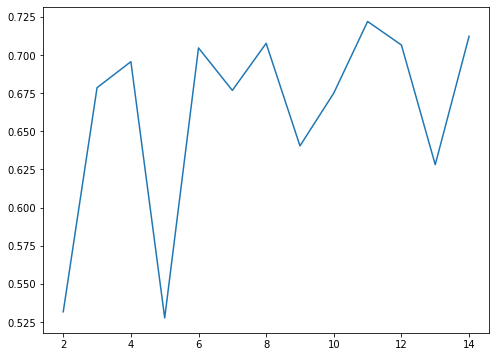

In [459]:
plt.figure(figsize = (8,6))
x,y = zip(*scores_mean)

plt.plot(x,y)

In [460]:
print("Number of Splits, R^2:", max(scores_mean ,key=lambda item:item[1]))

Number of Splits, R^2: (11, 0.7220055205047025)


Search for best combination of splits and depth to check if it's the same as it was when we searched for best values seperately

In [461]:
scores_mean2 = []
for depth_ in depths:
    for num in number_of_splits:
        regressor = DecisionTreeRegressor(max_depth = depth_)
        regressor.fit(feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                  feature_set['amount'])
    
        scores = cross_val_score(regressor, feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                          feature_set['amount'], scoring='r2', cv=num)
        scores_mean2.append((depth_, num, scores.mean()))
        

In [462]:
print("Depth, Number of Splits, R^2:", max(scores_mean2 ,key=lambda item:item[2]))

Depth, Number of Splits, R^2: (8, 11, 0.7219091849484784)


Best combination depth 8, number of splits 11

Get different scores (MAE, MSE, RMSE)

In [463]:
scorers = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [464]:
regressor = DecisionTreeRegressor(max_depth=8)
for scorer in scorers:
    scores = -cross_val_score(regressor,feature_set[['max_temp', 'precip', 'day_of_week', 
                                                            'hour_of_the_day', 'month']], 
                          feature_set['amount'], scoring = scorer, cv=11)
    print(scorer)
    print(scores)
    print("mean:", scores.mean())
    print("")

neg_mean_absolute_error
[ 8.65605713  8.26942591  5.78460918  5.84495413  6.59536824  7.33029164
  7.94639499  8.32669882  9.42622436 10.95756444 10.36180626]
mean: 8.136308644840419

neg_mean_squared_error
[168.95336848 165.90702165  62.89580623  70.13717713  86.27712024
 107.8518799  137.64289991 135.20555157 444.34665737 264.31322562
 256.99507107]
mean: 172.77507083302086

neg_root_mean_squared_error
[13.00101597 12.88576896  7.93068763  8.37479415  9.2885478  10.38517597
 11.72934518 11.62779221 21.07953172 16.2577128  16.01748007]
mean: 12.597986586768087



Finetuning of hyperparameters

In [465]:
# min_samples_split: int, float, optional (default=2)
# The minimum number of samples required to split an internal node
sp = [2,3,4,5,6,7,8,9,10]
scores_mean = []

In [466]:
for sp_ in sp:    
    regressor = DecisionTreeRegressor(max_depth=8, min_samples_split = sp_)
    regressor.fit(feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                  feature_set['amount'])
    scores = cross_val_score(regressor, feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                             feature_set['amount'], scoring='r2', cv=11)
    scores_mean.append((sp_, scores.mean()))

In [467]:
print("min_sample_split, r^2", max(scores_mean ,key=lambda item:item[1]))

min_sample_split, r^2 (8, 0.7231828168945614)


In [468]:
regressor = DecisionTreeRegressor(max_depth=8, min_samples_split = 8)
regressor.fit(feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                  feature_set['amount'])

DecisionTreeRegressor(max_depth=8, min_samples_split=8)

In [469]:
#vreate a list for our final scores
final_values = []
# add r^2 value to final_values
final_values.append((max(scores_mean ,key=lambda item:item[1]))[1])

In [470]:
for scorer in scorers:
    scores = -cross_val_score(regressor,feature_set[['max_temp', 'precip', 'day_of_week', 
                                                            'hour_of_the_day', 'month']], 
                          feature_set['amount'], scoring = scorer, cv=11)
    final_values.append(scores.mean())
    print(scorer)
    print(scores)
    print("mean:", scores.mean(), "\n")

neg_mean_absolute_error
[ 8.62003698  8.221507    5.80110792  5.83847698  6.57540602  7.34204647
  7.93413638  8.30276934  9.43806007 10.92793014 10.35049719]
mean: 8.122906771579956 

neg_mean_squared_error
[168.3037939  163.7654982   63.06158989  70.06510598  86.60291124
 108.4114237  137.48374033 135.00718885 444.4258066  263.25910624
 256.41671027]
mean: 172.4366250177315 

neg_root_mean_squared_error
[12.97319521 12.79708944  7.94113278  8.37049019  9.30606852 10.41208066
 11.72534606 11.61925939 21.08140903 16.22526136 16.0130169 ]
mean: 12.587668140673703 



In [471]:
# temp,precip,day of week, hour of the day, month
Xnew = np.array([[28,0,4,20,7]]) #predict peak demand at 30deg c, no rain, thursday, 8p.m., june
print(regressor.predict(Xnew))

[60.83636364]


performs slightly better than with default value on all scorers

Final Evaluation Values:

In [472]:
print("r^2:", round(final_values[0], 4))
print("MAE:", round(final_values[1], 4))
print("MSE:", round(final_values[2], 4))
print("RSME:", round(final_values[3], 4))

r^2: 0.7232
MAE: 8.1229
MSE: 172.4366
RSME: 12.5877
